In [1]:
from ND_north_star.src.utils.data_to_xarray import create_perlin_dataset, xarray_to_dict

In [2]:
resolution = 80
octave = 3
dimensions = [resolution, resolution]
boundary_points = 500

images = 5

octave_ds = create_perlin_dataset(images, dimensions=dimensions, octave=octave, random_num_samples=1000, boundary_points=boundary_points)

Skipping boundary -1: Not enough points to fit a spline.


In [3]:
import xarray as xr

resolution = 80
dimensions = [resolution, resolution]
octaves = [2,3,4,5]

octave_datasets = []

for octave in octaves:

    print(octave)

    images = 5
    boundary_points = 500

    octave_ds = create_perlin_dataset(images, dimensions=dimensions, octave=octave, random_num_samples=1000, boundary_points=boundary_points)
    


    data_image_0 = octave_ds.isel(image=1) #33,22,0
    print(data_image_0['octaves'])
    # for i, ds in enumerate(octave_ds):
    #     octaves_value = ds.attrs.get('octaves', 'Attribute not found')
    #     print(f"Dataset {i} octaves: {octaves_value}")
    
    octave_datasets.append(octave_ds)

# Concatenate them along the 'image' dimension
combined_ds = xr.concat(octave_datasets, dim='image')

2
Skipping boundary -1: Not enough points to fit a spline.


KeyError: "No variable named 'octaves'. Variables on the dataset include ['values', 'sampled_values', 'feature_ind', 'X0', 'X1', ..., 'X1_boundary', 'sampled_ind', 'X0_sampled', 'X1_sampled', 'image']"

In [ ]:
print(combined_ds)

<xarray.Dataset> Size: 1MB
Dimensions:         (image: 20, index: 6400, sampled_ind: 1000,
                     feature_ind: 6400, boundary_index: 500)
Coordinates:
  * feature_ind     (feature_ind) int32 26kB 0 1 2 3 4 ... 6396 6397 6398 6399
    X0              (feature_ind) float64 51kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    X1              (feature_ind) float64 51kB 0.0 0.01266 ... 0.9873 1.0
  * boundary_index  (boundary_index) int32 2kB 0 1 2 3 4 ... 495 496 497 498 499
    X0_boundary     (image, boundary_index) float64 80kB 0.0003361 ... 0.5433
    X1_boundary     (image, boundary_index) float64 80kB 0.006122 ... 0.366
  * sampled_ind     (sampled_ind) int32 4kB 0 1 2 3 4 5 ... 995 996 997 998 999
    X0_sampled      (image, sampled_ind) float64 160kB 0.8734 0.3165 ... 0.6076
    X1_sampled      (image, sampled_ind) float64 160kB 0.2658 0.2658 ... 0.4684
  * image           (image) int64 160B 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4
Dimensions without coordinates: index
Data variab

In [ ]:
data_image_0 = combined_ds.isel(image=18) #33,22,0
print(data_image_0)

<xarray.Dataset> Size: 188kB
Dimensions:         (index: 6400, sampled_ind: 1000, feature_ind: 6400,
                     boundary_index: 500)
Coordinates:
  * feature_ind     (feature_ind) int32 26kB 0 1 2 3 4 ... 6396 6397 6398 6399
    X0              (feature_ind) float64 51kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    X1              (feature_ind) float64 51kB 0.0 0.01266 ... 0.9873 1.0
  * boundary_index  (boundary_index) int32 2kB 0 1 2 3 4 ... 495 496 497 498 499
    X0_boundary     (boundary_index) float64 4kB -0.001298 0.0116 ... 0.1906
    X1_boundary     (boundary_index) float64 4kB 0.2055 0.2009 ... 0.3929 0.4104
  * sampled_ind     (sampled_ind) int32 4kB 0 1 2 3 4 5 ... 995 996 997 998 999
    X0_sampled      (sampled_ind) float64 8kB 0.1899 0.6329 ... 0.4177 0.8354
    X1_sampled      (sampled_ind) float64 8kB 0.7595 0.7342 ... 0.5316 0.8228
    image           int64 8B 3
Dimensions without coordinates: index
Data variables:
    values          (index) int32 26kB 1 1 1 1 1 1 1

In [ ]:
save_dict = xarray_to_dict(data_image_0)
print(save_dict.keys())

dict_keys(['features', 'features_sampled', 'values', 'values_sampled', 'resolution', 'octaves', 'boundary_splines', 'dimension'])


2


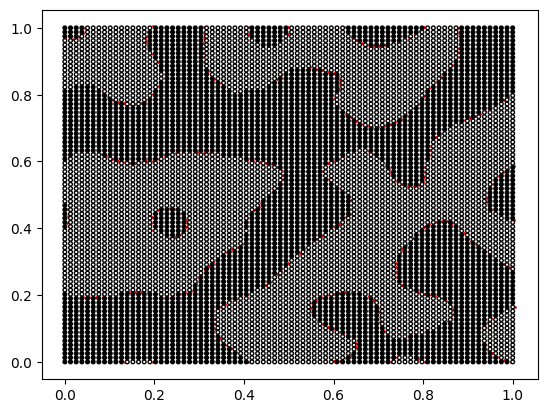

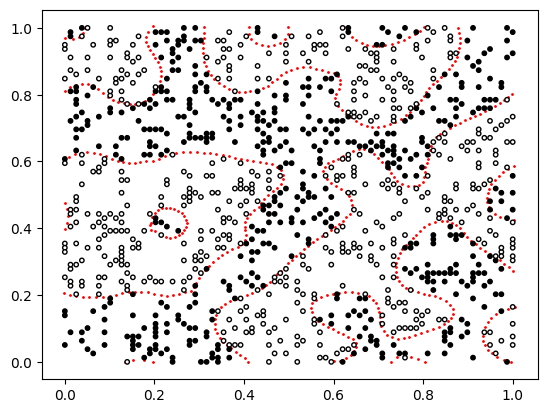

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(save_dict['octaves'])

X0, X1, V = np.array(save_dict['features'])[:, 0], np.array(save_dict['features'])[:, 1], save_dict['values']
boundary_points = save_dict['boundary_splines']

plt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='red', s=1)
plt.scatter(X0, X1, c=V, s=7, cmap='gray_r', edgecolors='black')
plt.show()

X0, X1, V = np.array(save_dict['features_sampled'])[:, 0], np.array(save_dict['features_sampled'])[:, 1], save_dict['values_sampled']
plt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='red', s=1)
plt.scatter(X0, X1, c=V, s=10, cmap='gray_r', edgecolors='black')
plt.show()
